# Demo: Analyzing Market Data Across Time

In [15]:
#####
#print(data.index) # confirm index is DateTimeIndex

#data[start:end] # note end is currently inclusive, may change with python version

#data["11/01/2021":"11/07/2021"] # Range on dates, includes the last date

#data["2021":] # Select everything starting at 2021

#data[:"2021"] # Select everthing ending on 12/31/2021
        
#data["2021":"2021"] # Starts begenning 2021, ends at end of 2021 (1 year of data)

#data["2021":"2022"] # Starts begenning of 2021, ends at end of 2022

# You can also use the index
#data[data.index.year == 2021] # only 2021

#data[data.index.year >= 2021] # Year 2021 and up

#data[data.index.dayofweek == 0] # Select every monday

#data[data.index.month == 12 & data.index.year = 2021] # December of 2021

# Even date time objects
#data[ ( pd.to_datetime('today') - pd.DateOffset(years=1) ) :]  # 1 Year from today and up

#data[ ( pd.to_datetime('today') - pd.DateOffset(months=6) ) :] # 6 Months from today 
######


In [16]:
# Initial imports
import pandas as pd
from pathlib import Path

In [17]:
# Read the new S&P 500 CSV data into a DataFrame
df_sp500 = pd.read_csv(
    Path("../Resources/sp500.csv")
)

# Display the DataFrame
df_sp500.head()

,time,close
0,2019-01-02 12:45:00+00:00,246.16
1,2019-01-02 13:00:00+00:00,246.15
2,2019-01-02 13:15:00+00:00,245.50
3,2019-01-02 13:30:00+00:00,245.71
4,2019-01-02 13:45:00+00:00,245.76


In [18]:
# Transform time column to datetime
df_sp500["time"] = pd.to_datetime(
    df_sp500["time"],
    infer_datetime_format=True,
    utc=True
)

# Convert the time column to the US/Estern timezone
df_sp500["time"] = df_sp500["time"].dt.tz_convert("US/Eastern")

# Verify data type transformation
df_sp500.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9328 entries, 0 to 9327
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype                     
---  ------  --------------  -----                     
 0   time    9328 non-null   datetime64[ns, US/Eastern]
 1   close   9328 non-null   float64                   
dtypes: datetime64[ns, US/Eastern](1), float64(1)
memory usage: 145.9 KB


In [19]:
# Set the time column as DataFrame index
df_sp500 = df_sp500.set_index("time")
# Display the DataFrame
df_sp500.head()


,close
time,
2019-01-02 07:45:00-05:00,246.16
2019-01-02 08:00:00-05:00,246.15
2019-01-02 08:15:00-05:00,245.50
2019-01-02 08:30:00-05:00,245.71
2019-01-02 08:45:00-05:00,245.76


In [20]:
# Querying individual date and time components
print(df_sp500.index.year)
print(df_sp500.index.month)
print(df_sp500.index.quarter)

Int64Index([2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019,
            ...
            2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019, 2019],
           dtype='int64', name='time', length=9328)
Int64Index([ 1,  1,  1,  1,  1,  1,  1,  1,  1,  1,
            ...
            12, 12, 12, 12, 12, 12, 12, 12, 12, 12],
           dtype='int64', name='time', length=9328)
Int64Index([1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
            ...
            4, 4, 4, 4, 4, 4, 4, 4, 4, 4],
           dtype='int64', name='time', length=9328)


<AxesSubplot:title={'center':'Historical S&P 500 Closing Prices'}, xlabel='time'>

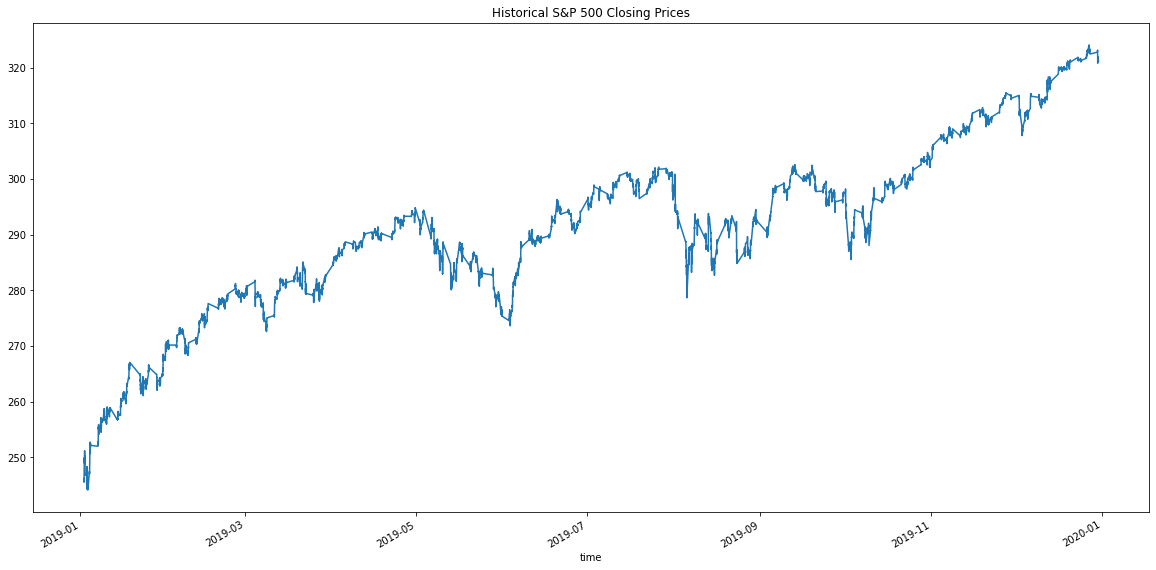

In [21]:
# Plot the close column to examine the trend for closing prices
df_sp500['close'].plot(
    title="Historical S&P 500 Closing Prices", 
    figsize=[20, 10]
)

In [22]:
# Pick a single date from the DataFrame
# Display the first 20 rows
df_sp500.loc["2019-06-06"].head(20)

,close
time,
2019-06-06 07:00:00-04:00,283.83
2019-06-06 07:15:00-04:00,283.89
2019-06-06 07:30:00-04:00,283.79
2019-06-06 07:45:00-04:00,283.89
2019-06-06 08:00:00-04:00,283.70
2019-06-06 08:15:00-04:00,283.80
2019-06-06 08:30:00-04:00,283.34
2019-06-06 08:45:00-04:00,283.13
2019-06-06 09:00:00-04:00,283.20


In [23]:
# Picking specific times from a datetime range
df_sp500.loc["2019-06-06 07:00:00":"2019-06-06 9:30:00"]

,close
time,
2019-06-06 07:00:00-04:00,283.83
2019-06-06 07:15:00-04:00,283.89
2019-06-06 07:30:00-04:00,283.79
2019-06-06 07:45:00-04:00,283.89
2019-06-06 08:00:00-04:00,283.70
2019-06-06 08:15:00-04:00,283.80
2019-06-06 08:30:00-04:00,283.34
2019-06-06 08:45:00-04:00,283.13
2019-06-06 09:00:00-04:00,283.20


<AxesSubplot:xlabel='time'>

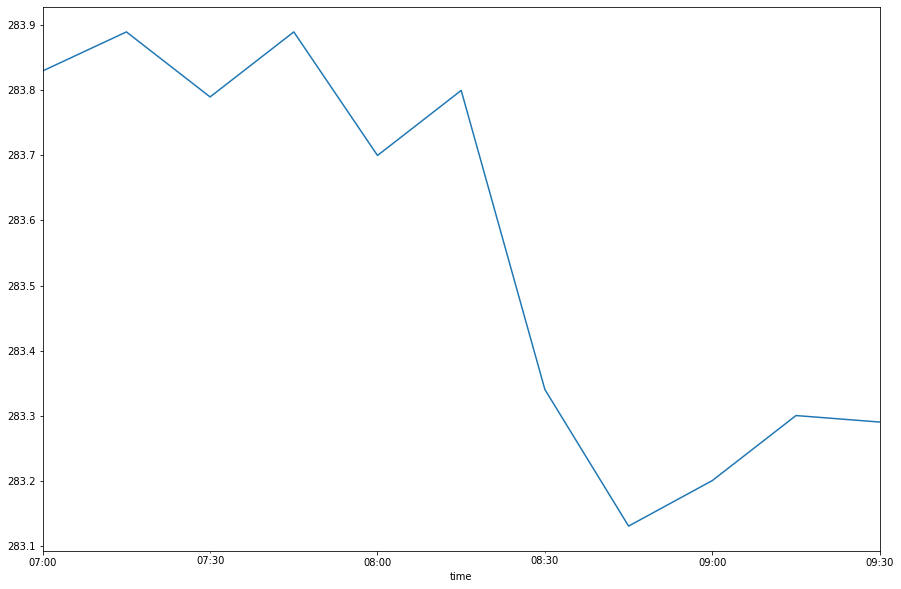

In [24]:
# Plotting pre-market hours trading (7:00 am - 9:30 am)
df_sp500.loc["2019-06-06 07:00:00":"2019-06-06 9:30:00"]["close"].plot(figsize=[15,10])

<AxesSubplot:xlabel='time'>

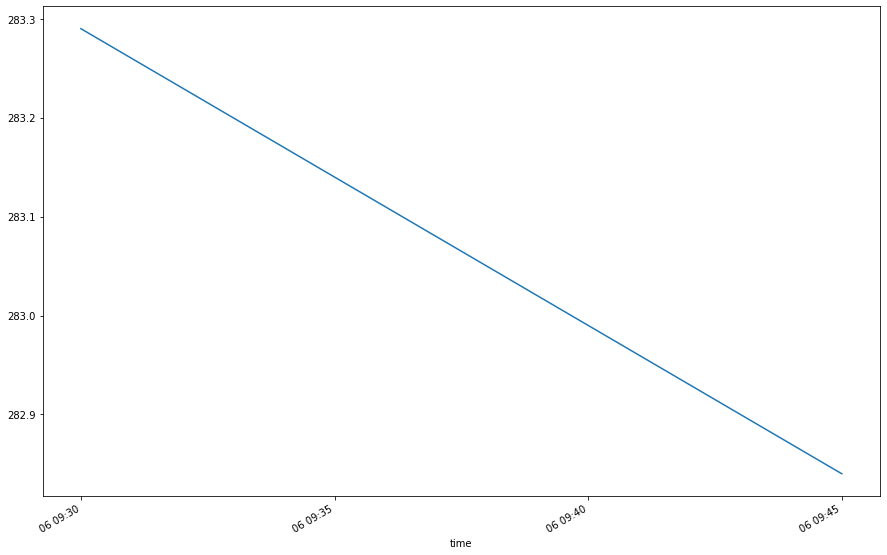

In [25]:
# When the stock market opens there is usually an initial push in one direction
df_sp500.loc["2019-06-06 09:30":"2019-06-06 09:45"]["close"].plot(figsize=[15,10])

<AxesSubplot:xlabel='time'>

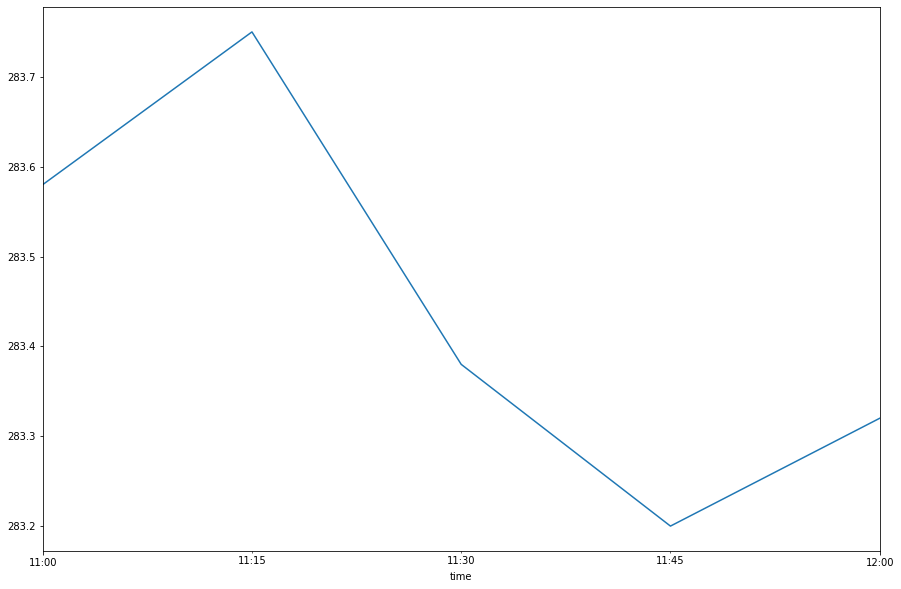

In [26]:
# Closing prices during lunch time
df_sp500.loc["2019-06-06 11:00":"2019-06-06 12:00"]["close"].plot(figsize=[15,10])

<AxesSubplot:xlabel='time'>

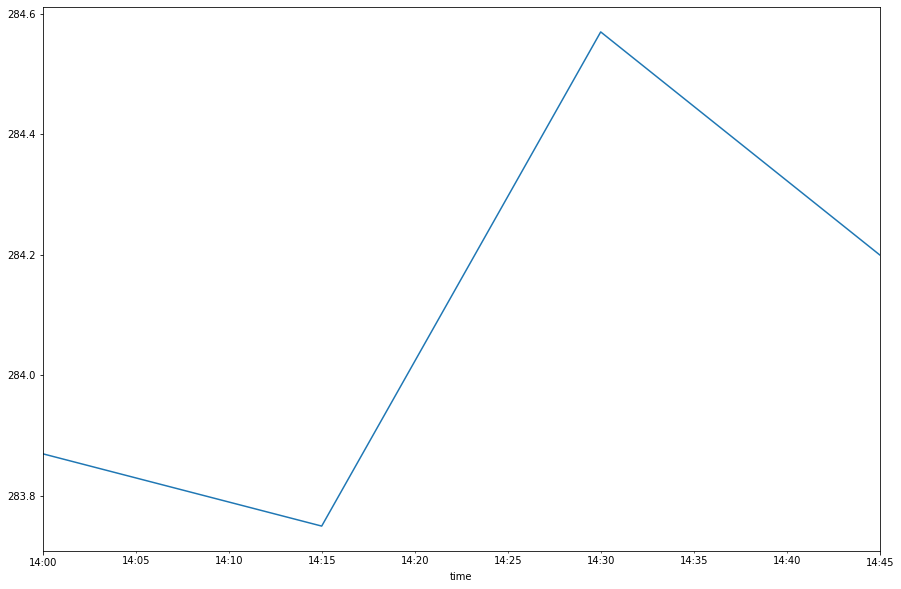

In [27]:
# Closing prices just a little over an hour before market close
df_sp500.loc['2019-06-06 14:00':'2019-06-06 14:45']["close"].plot(figsize=[15,10])

<AxesSubplot:xlabel='time'>

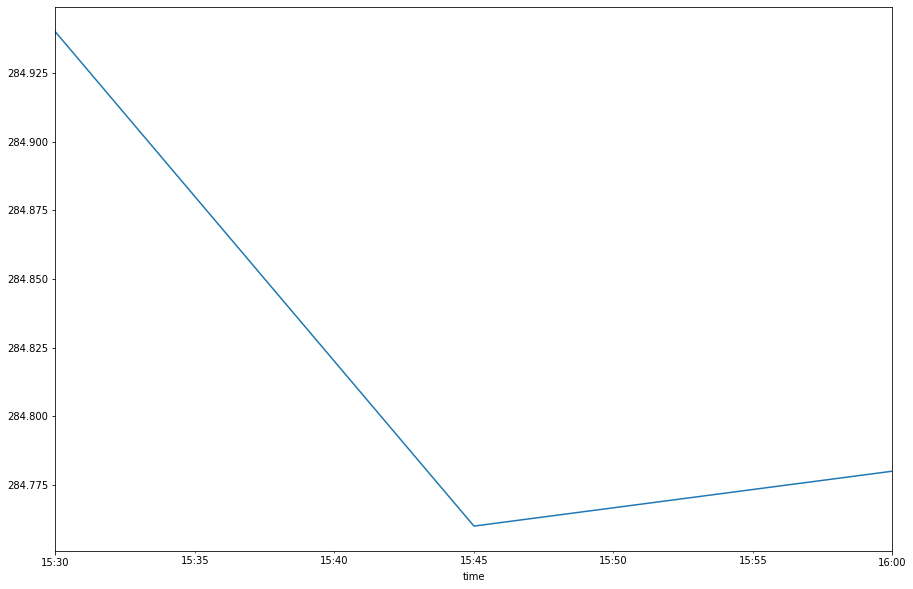

In [28]:
# Closing prices thirty minutes before market closes
df_sp500.loc['2019-06-06 15:30':'2019-06-06 16:00']["close"].plot(figsize=[15,10])